In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Developed Pipeline based on Research Paper

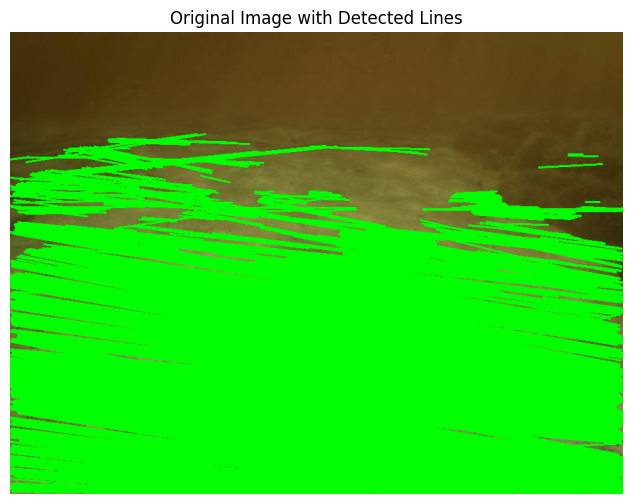

execution time for research paper pipeline =  1.7192161083221436


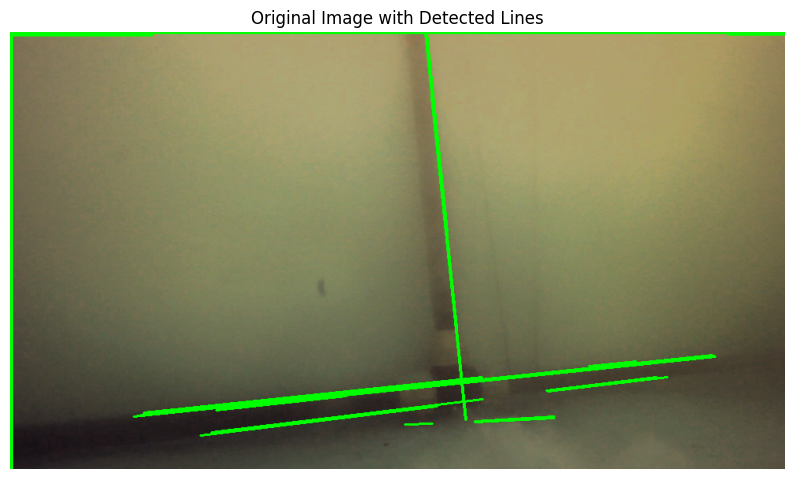

execution time for research paper pipeline =  3.218431234359741


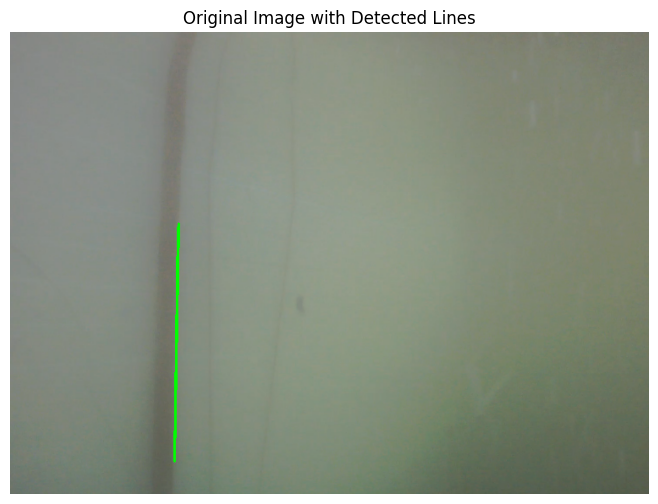

execution time for research paper pipeline =  4.448078632354736


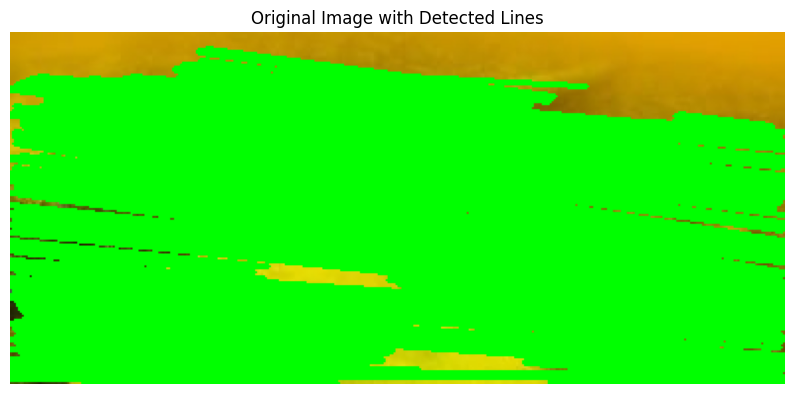

execution time for research paper pipeline =  5.476787328720093


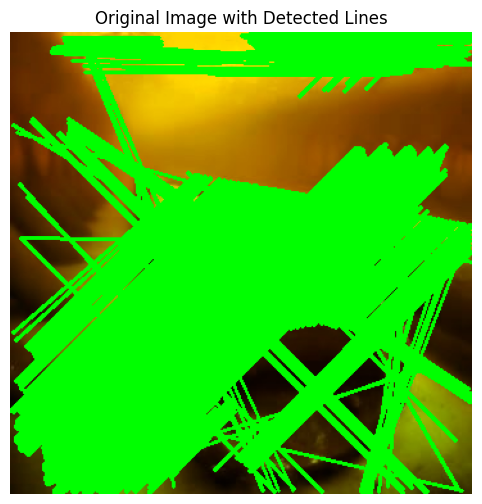

execution time for research paper pipeline =  6.047459363937378


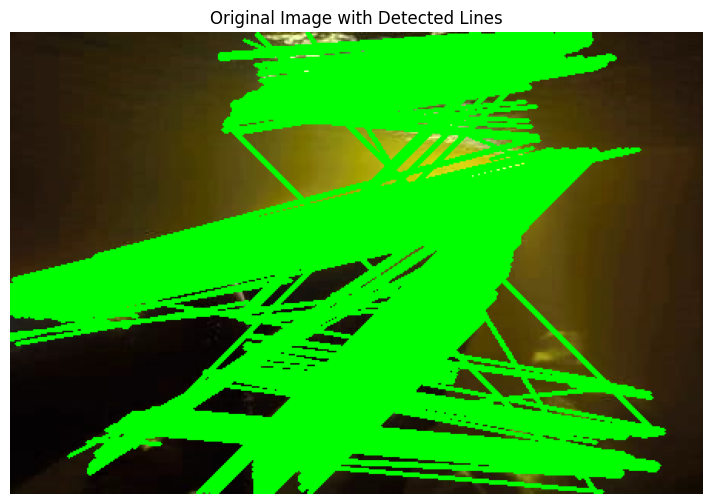

execution time for research paper pipeline =  6.554813623428345


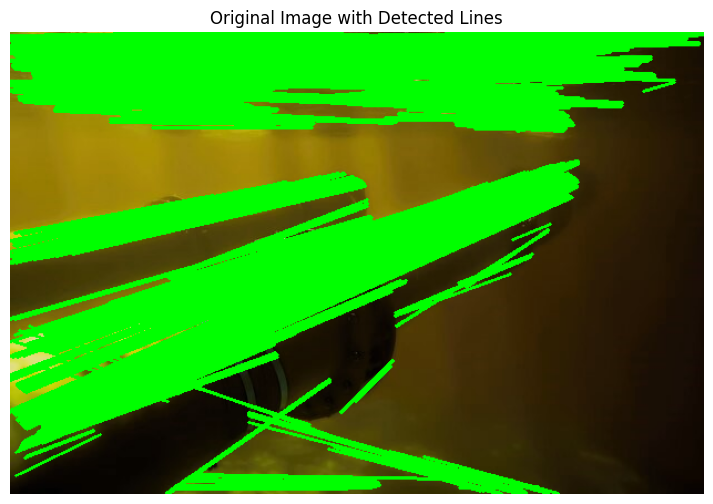

execution time for research paper pipeline =  7.606585502624512


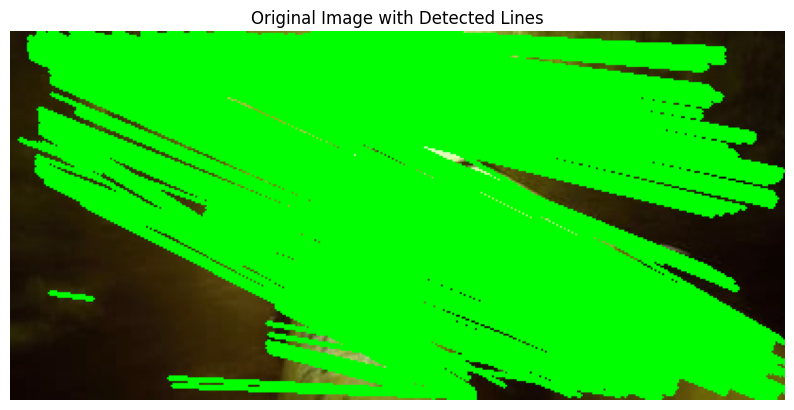

execution time for research paper pipeline =  8.521923542022705


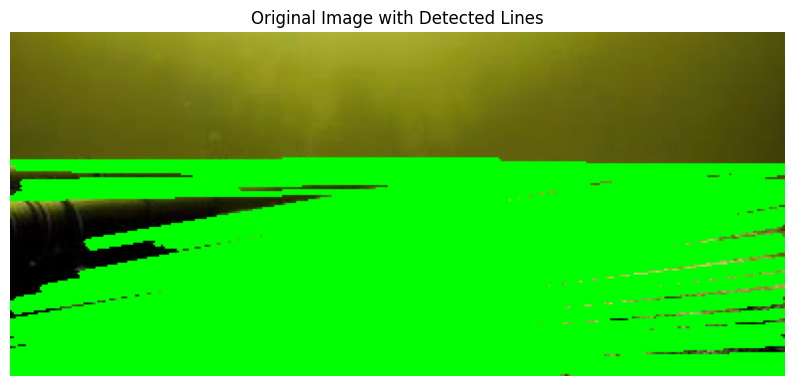

execution time for research paper pipeline =  9.254517555236816


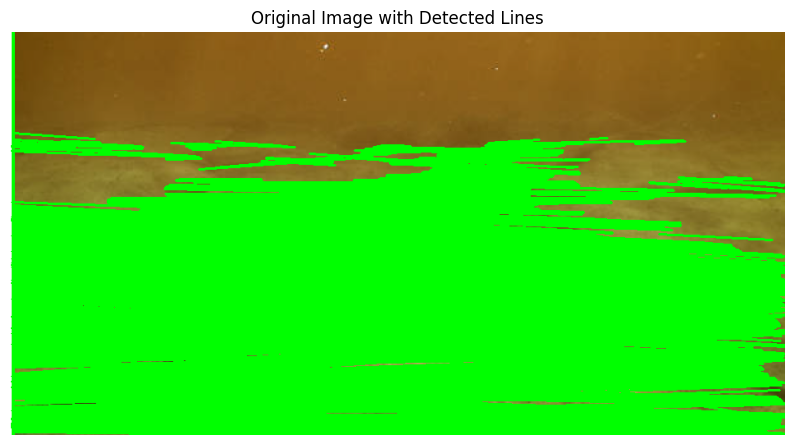

execution time for research paper pipeline =  10.082111835479736


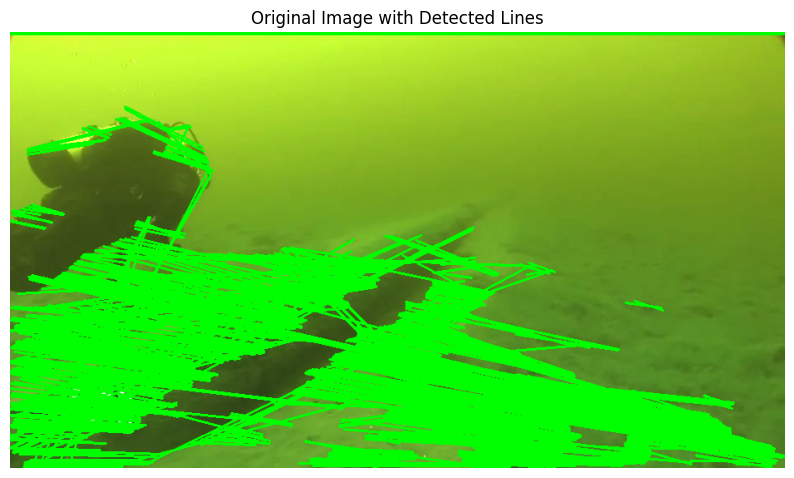

execution time for research paper pipeline =  10.491938591003418


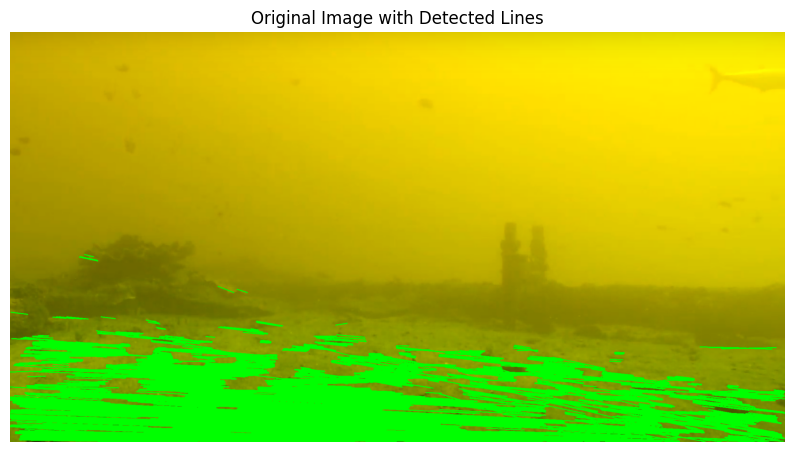

execution time for research paper pipeline =  11.19730281829834


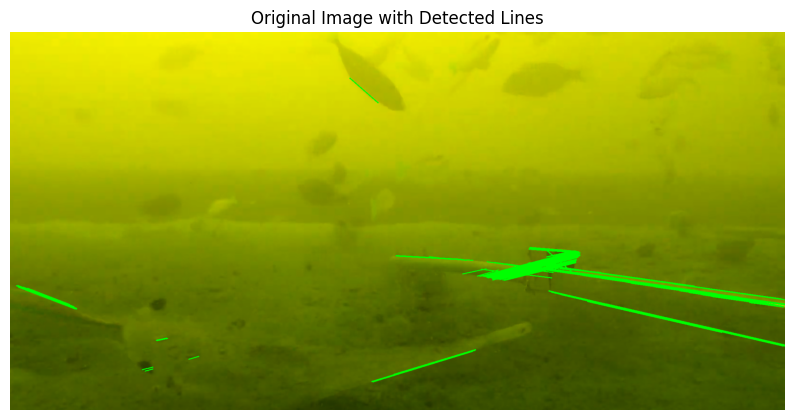

execution time for research paper pipeline =  11.89306902885437


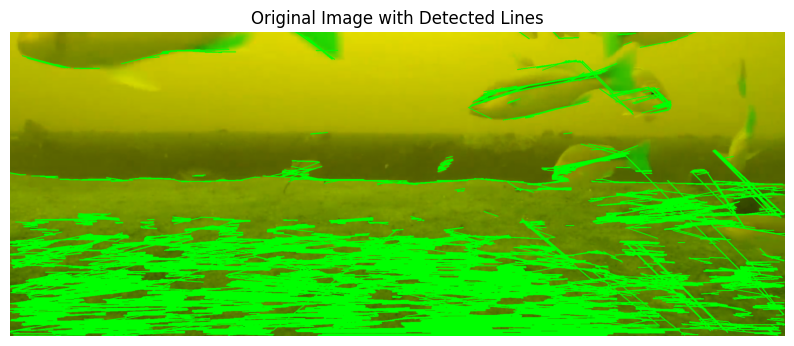

execution time for research paper pipeline =  12.918561935424805


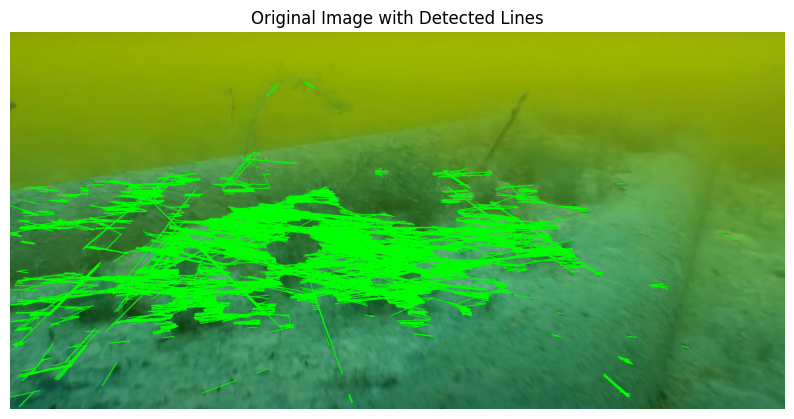

execution time for research paper pipeline =  14.032343626022339


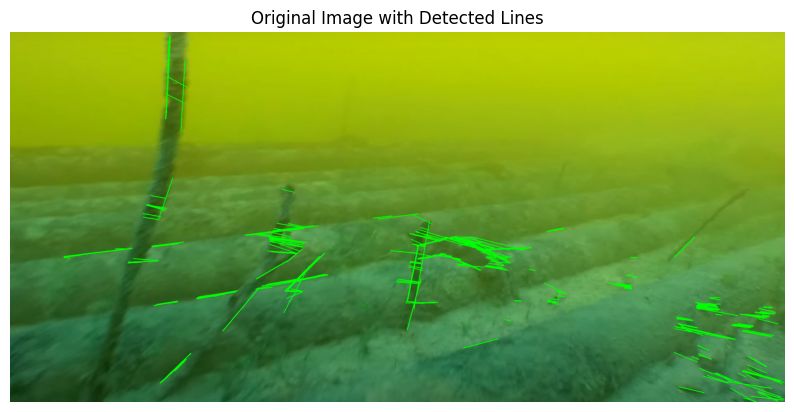

execution time for research paper pipeline =  15.440598726272583


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Step 1: Convert RGB image to LAB color space
def rgb_to_lab(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    return lab_image

# Step 2: Apply Gaussian blur filter
def apply_gaussian_blur(image):
    blurred_image = cv2.GaussianBlur(image, (3, 3), 0)  # Kernel size is fixed to (3, 3)
    return blurred_image

# Step 3: Apply Canny edge detection algorithm
def apply_canny_edge_detection(image, lower_threshold, upper_threshold):
    edges = cv2.Canny(image, lower_threshold, upper_threshold)
    return edges

# Step 4: Apply dilation morphological filter
def apply_dilation(image):
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    return dilated_image

# Step 5: Apply contour detection
def apply_contour_detection(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Step 6: Filter contours by hierarchy and minimum contour area threshold
def filter_contours(contours, min_area_threshold):
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area_threshold]
    return filtered_contours

# Step 7: Apply erosion morphological filter
def apply_erosion(image):
    kernel = np.ones((2, 2), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image

# Step 8: Apply Hough transform
def apply_hough_transform(image, min_line_length=50, max_line_gap=50):
    lines = cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=100, minLineLength=min_line_length, maxLineGap=max_line_gap)
    return lines

# Step 9: Merge the detected lines based on minimum distance threshold
def merge_lines(lines, min_distance_threshold):
    merged_lines = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            merged_lines.append([x1, y1, x2, y2])

    return merged_lines

# Step 10: Display the image
def display_image(image, title='Image'):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    start_time =time.time()
    # Path to the folder containing images
    folder_path = '/content/drive/MyDrive/COMPUTER VISSION ALLIANCE'

    # List all files in the folder
    files = os.listdir(folder_path)

    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):  # Check if file is an image
            # Load the image
            image_path = os.path.join(folder_path, file)
            original_image = cv2.imread(image_path)
            original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

            # Pre-processing steps
            lab_image = rgb_to_lab(original_image_rgb)
            preprocessed_image = apply_gaussian_blur(lab_image)

            # Canny edge detection step
            lower_threshold = 10  # Adjust as needed
            upper_threshold = 40  # Adjust as needed
            edges_image = apply_canny_edge_detection(preprocessed_image, lower_threshold, upper_threshold)

            # Dilation morphological filter step
            dilated_image = apply_dilation(edges_image)

            # Contour detection step
            contours = apply_contour_detection(dilated_image)

            # Filter contours step
            min_area_threshold = 20  # Adjust as needed
            filtered_contours = filter_contours(contours, min_area_threshold)

            # Create a binary image with filtered contours
            filtered_contours_image = np.zeros_like(dilated_image)
            cv2.drawContours(filtered_contours_image, filtered_contours, -1, 255, thickness=cv2.FILLED)

            # Erosion morphological filter step
            eroded_image = apply_erosion(filtered_contours_image)

            # Apply Hough transform
            min_line_length = 20  # Minimum line length
            max_line_gap = 50  # Maximum gap between lines to be considered as single line
            detected_lines = apply_hough_transform(eroded_image, min_line_length, max_line_gap)

            # Merge the detected lines
            min_distance_threshold = 10  # Adjust as needed
            merged_lines = merge_lines(detected_lines, min_distance_threshold)

            # Draw detected lines on the original image
            if merged_lines is not None:
                for line in merged_lines:
                    x1, y1, x2, y2 = line
                    cv2.line(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green lines for detected lines
            execution_time = time.time()-start_time
            # Display the original image with detected lines
            plt.figure(figsize=(10, 6))
            plt.imshow(original_image)
            plt.title('Original Image with Detected Lines')
            plt.axis('off')
            plt.show()
            print("execution time for research paper pipeline = ",execution_time)